<a href="https://www.kaggle.com/code/albertobircoci/top10-crypto-analysis?scriptVersionId=230739024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this notebook, we will explore and analyze historical data for the top 10 cryptocurrencies. The dataset includes daily closing prices and trading volumes for major coins such as Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB), and others.

Our goal is to clean the data, handle any missing values, and extract useful insights through visualizations and basic analysis. This will help us understand trends, patterns, and the overall behavior of the cryptocurrency market over time.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "/kaggle/input/top10-cryptocurrencies-03-2025/Top10_Cryptocurrencies_03_2025.csv"
df = pd.read_csv(csv_file)

print("Shape of DataFrame:", df.shape)
print("\nSample rows:")
display(df.head(5))


Shape of DataFrame: (3851, 21)

Sample rows:


Price btc_closing_price btc_volume eth_closing_price eth_volume  \
0    Ticker           BTC-USD    BTC-USD           ETH-USD    ETH-USD   
1      Date               NaN        NaN               NaN        NaN   
2  17/09/14       457.3340149   21056800               NaN        NaN   
3  18/09/14       424.4400024   34483200               NaN        NaN   
4  19/09/14         394.79599   37919700               NaN        NaN   

  usdt_closing_price usdt_volume xrp_closing_price xrp_volume  \
0           USDT-USD    USDT-USD           XRP-USD    XRP-USD   
1                NaN         NaN               NaN        NaN   
2                NaN         NaN               NaN        NaN   
3                NaN         NaN               NaN        NaN   
4                NaN         NaN               NaN        NaN   

  bnb_closing_price  ... sol_closing_price sol_volume usdc_closing_price  \
0           BNB-USD  ...           SOL-USD    SOL-USD           USDC-USD   
1               NaN  ...               NaN        NaN                NaN   
2               NaN  ...               NaN        NaN                NaN   
3               NaN  ...               NaN        NaN                NaN   
4               NaN  ...               NaN        NaN                NaN   

  usdc_volume doge_closing_price doge_volume ada_closing_price ada_volume  \
0    USDC-USD           DOGE-USD    DOGE-USD           ADA-USD    ADA-USD   
1         NaN                NaN         NaN               NaN        NaN   
2         NaN                NaN         NaN               NaN        NaN   
3         NaN                NaN         NaN               NaN        NaN   
4         NaN                NaN         NaN               NaN        NaN   

  trx_closing_price trx_volume  
0           TRX-USD    TRX-USD  
1               NaN        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  

[5 rows x 21 columns]

Now, let's check how many valid (non-missing) entries we have for the closing prices and trading volumes of each cryptocurrency. This will help us understand the completeness of the dataset for each coin.

In [15]:
coins = {
    "BTC-USD": "btc","ETH-USD": "eth","USDT-USD": "usdt","XRP-USD":  "xrp","BNB-USD":  "bnb","SOL-USD":  "sol","USDC-USD": "usdc","DOGE-USD": "doge","ADA-USD":  "ada","TRX-USD":  "trx"
}

for ticker, short_sym in coins.items():
    closing_col = f"{short_sym}_closing_price"
    volume_col = f"{short_sym}_volume"

    n_close = df[closing_col].notna().sum() if closing_col in df.columns else 0
    n_volume = df[volume_col].notna().sum() if volume_col in df.columns else 0
    print(f"{ticker} ({short_sym.upper()}):")
    print(f"  - {closing_col} entries: {n_close}")
    print(f"  - {volume_col} entries: {n_volume}\n")


BTC-USD (BTC):
  - btc_closing_price entries: 3850
  - btc_volume entries: 3850

ETH-USD (ETH):
  - eth_closing_price entries: 2701
  - eth_volume entries: 2701

USDT-USD (USDT):
  - usdt_closing_price entries: 2701
  - usdt_volume entries: 2701

XRP-USD (XRP):
  - xrp_closing_price entries: 2701
  - xrp_volume entries: 2701

BNB-USD (BNB):
  - bnb_closing_price entries: 2701
  - bnb_volume entries: 2701

SOL-USD (SOL):
  - sol_closing_price entries: 1818
  - sol_volume entries: 1818

USDC-USD (USDC):
  - usdc_closing_price entries: 2368
  - usdc_volume entries: 2368

DOGE-USD (DOGE):
  - doge_closing_price entries: 2701
  - doge_volume entries: 2701

ADA-USD (ADA):
  - ada_closing_price entries: 2701
  - ada_volume entries: 2701

TRX-USD (TRX):
  - trx_closing_price entries: 2701
  - trx_volume entries: 2701



To prepare the data for analysis, we first convert the price and volume columns to numeric format. Then, we calculate the average daily closing price and trading volume for each cryptocurrency. Finally, we visualize these averages using bar charts.


-These charts give us a quick overview of which cryptocurrencies had the highest average prices and trading volumes over the given period.



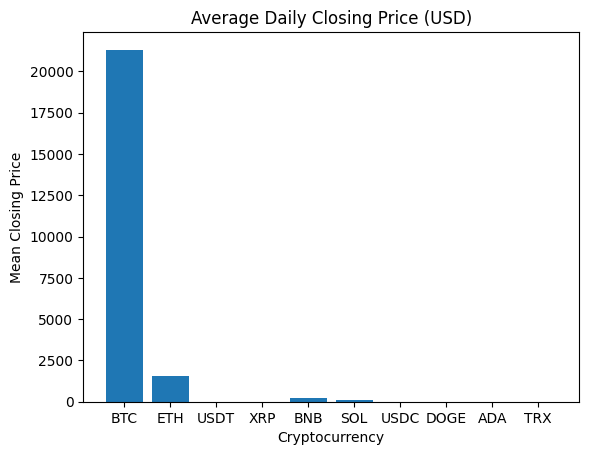

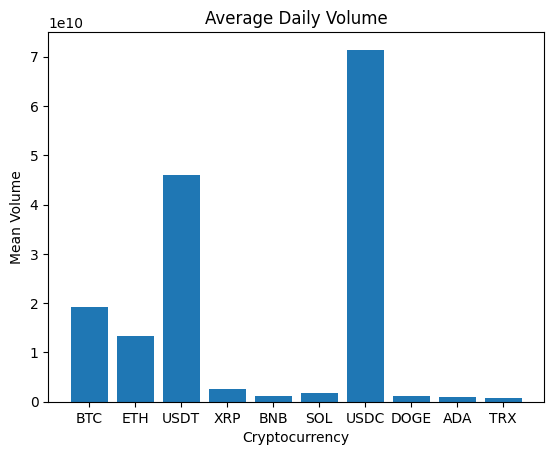

In [17]:
for ticker, short_sym in coins.items():
    price_col = f"{short_sym}_closing_price"
    volume_col = f"{short_sym}_volume"

    if price_col in df.columns:
        df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
    if volume_col in df.columns:
        df[volume_col] = pd.to_numeric(df[volume_col], errors="coerce")

symbols = []
avg_closing_prices = []
avg_volumes = []

for ticker, short_sym in coins.items():
    col_price = f"{short_sym}_closing_price"
    col_vol = f"{short_sym}_volume"

    if col_price in df.columns:
        price_mean = df[col_price].mean(skipna=True)
    else:
        price_mean = float("nan")

    if col_vol in df.columns:
        volume_mean = df[col_vol].mean(skipna=True)
    else:
        volume_mean = float("nan")

    symbols.append(short_sym.upper())
    avg_closing_prices.append(price_mean)
    avg_volumes.append(volume_mean)

plt.bar(symbols, avg_closing_prices)
plt.title("Average Daily Closing Price (USD)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Mean Closing Price")
plt.show()

plt.bar(symbols, avg_volumes)
plt.title("Average Daily Volume")
plt.xlabel("Cryptocurrency")
plt.ylabel("Mean Volume")
plt.show()

From the first chart, we can see that Bitcoin (BTC) has the highest average daily closing price by far, followed by Ethereum (ETH). The other cryptocurrencies have significantly lower average prices.

In the second chart, USDC and USDT stand out with the highest average daily trading volumes, likely due to their role as stablecoins often used in crypto trading. Bitcoin and Ethereum also show strong volumes, while the remaining coins have lower average activity.

The time series data for each cryptocurrency is visualized below.
The Date column is converted to datetime format, then the daily closing price and trading volume are plotted over time. 
The charts show how the price and volume evolved throughout the dataset. Some cryptocurrencies display clear growth or volatility patterns, while others have limited or sparse data.

<ipython-input-32-ec2f169244db>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date_dt"] = pd.to_datetime(df["Date"],
<ipython-input-32-ec2f169244db>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date_dt"] = pd.to_datetime(df["Date"],


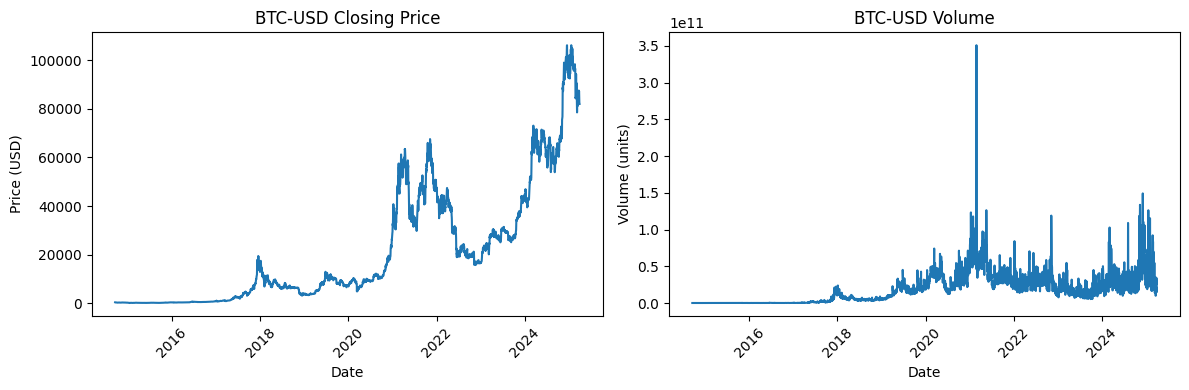

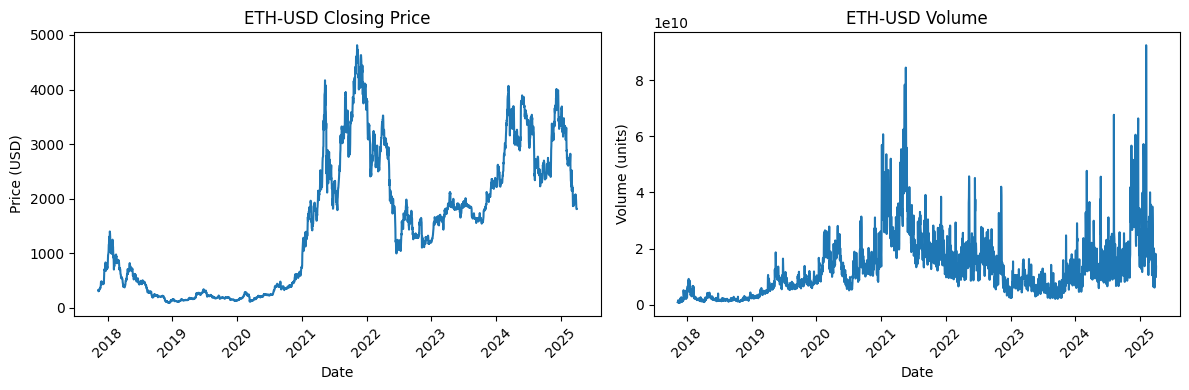

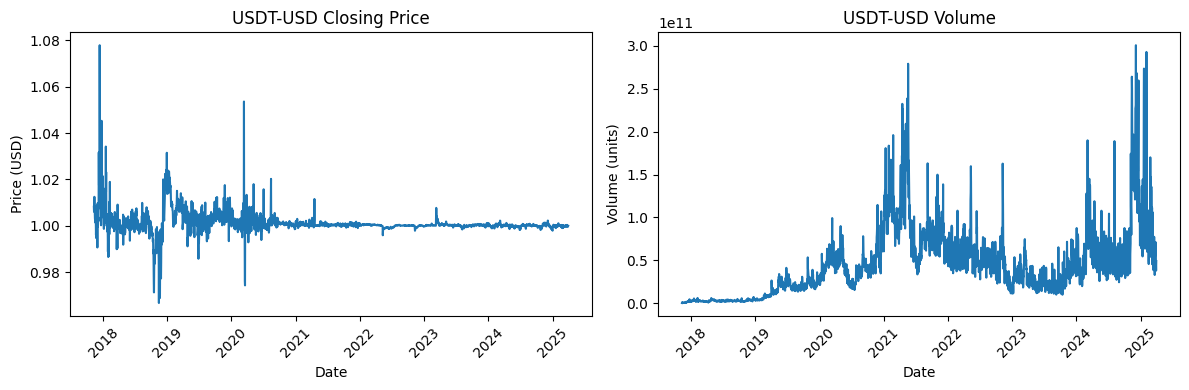

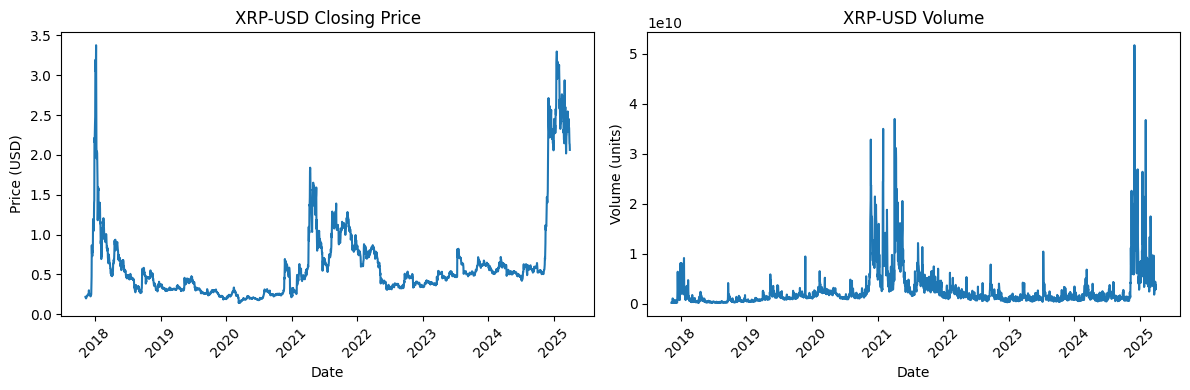

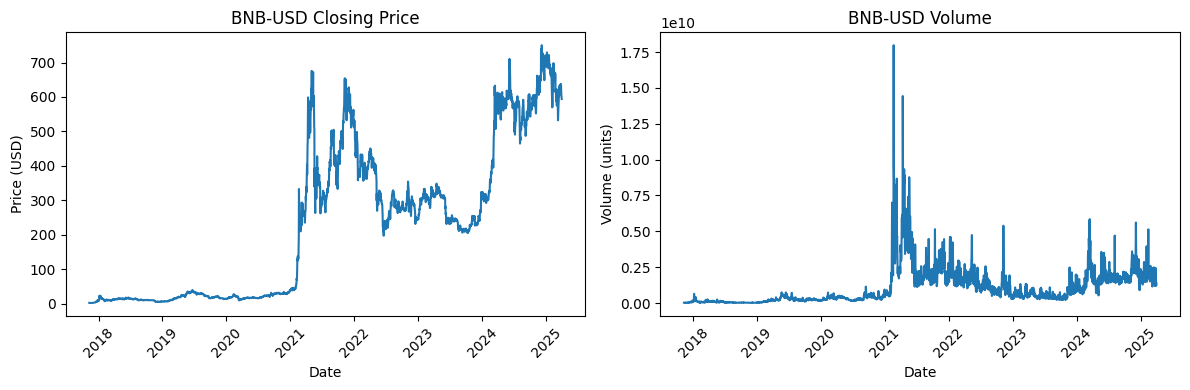

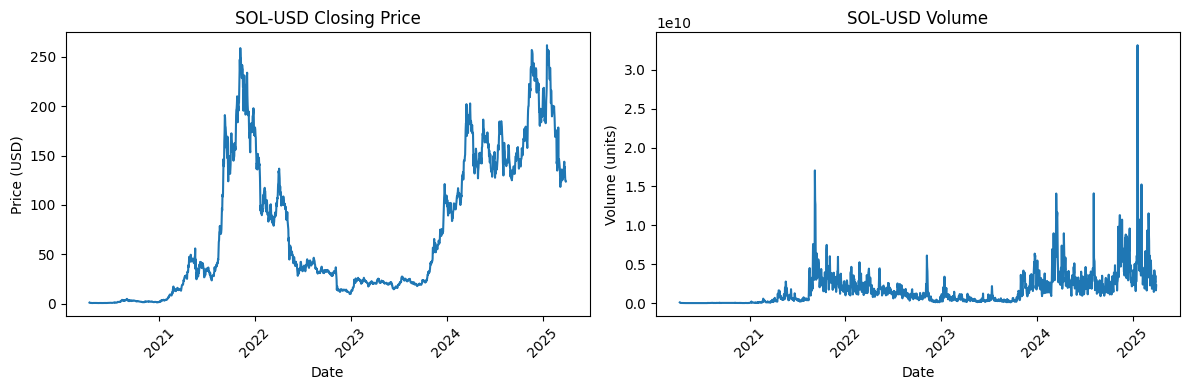

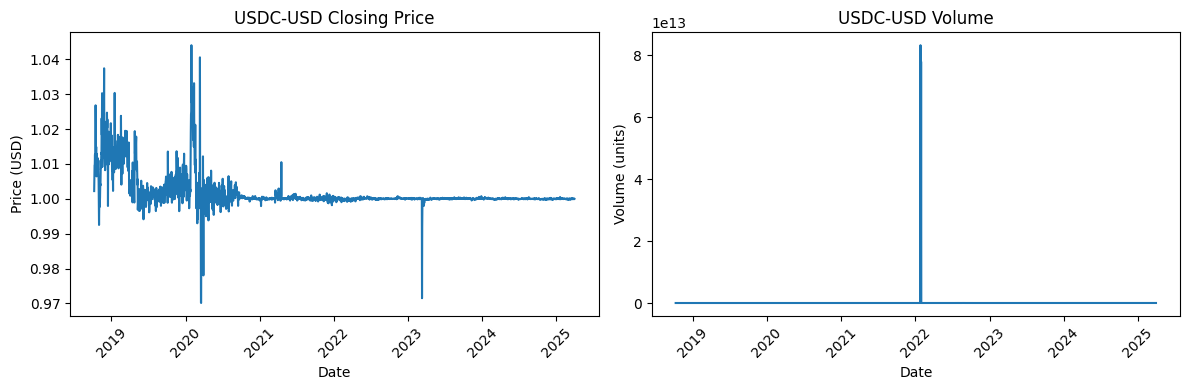

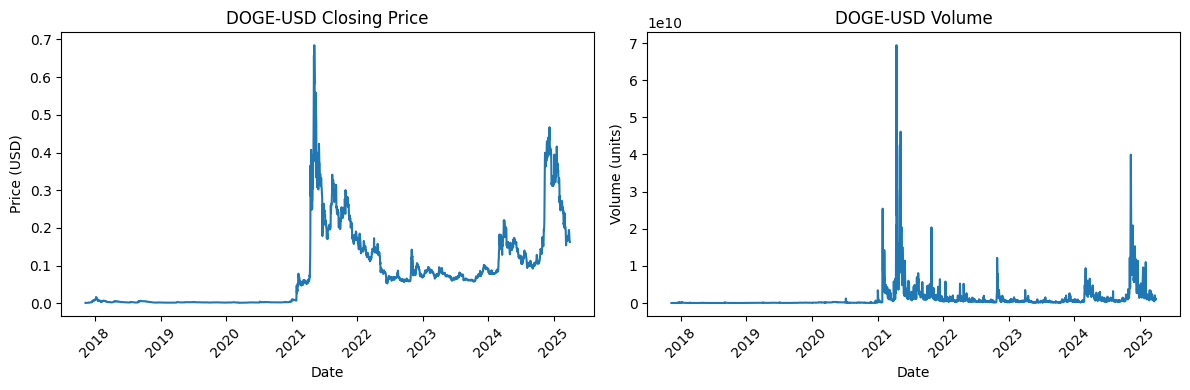

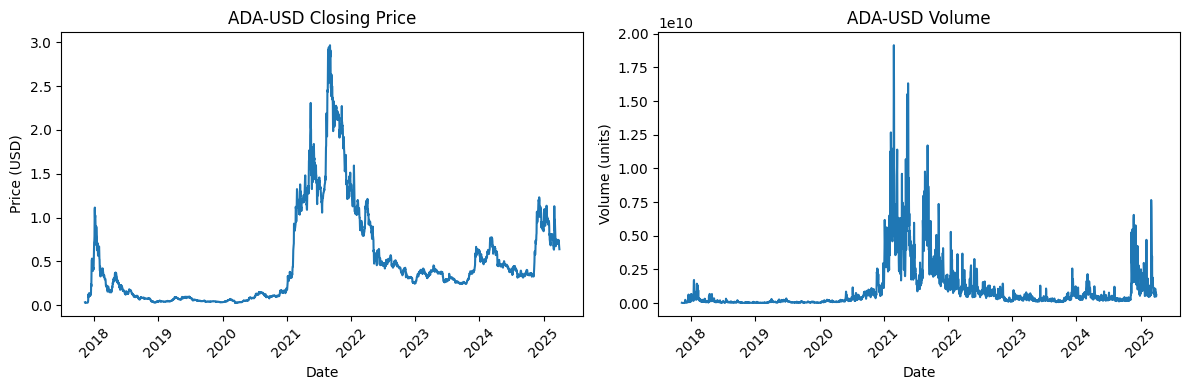

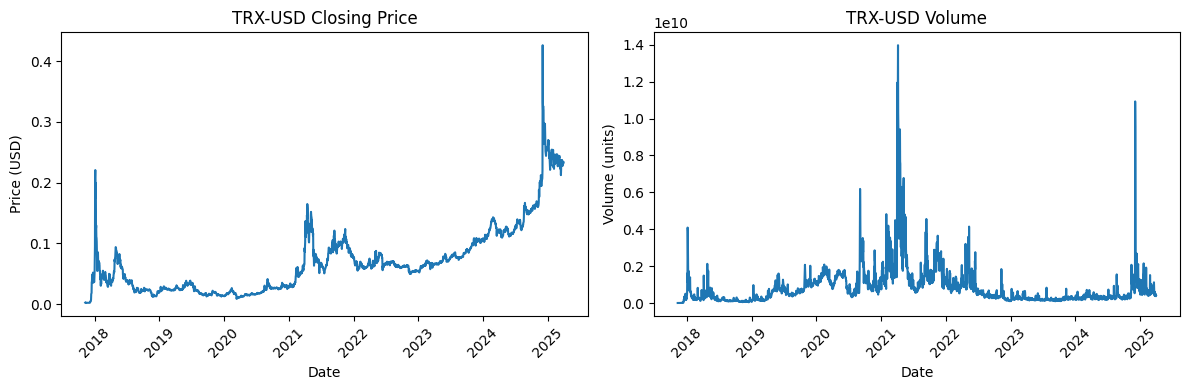

In [32]:
df.rename(columns={"Price": "Date"}, inplace=True)
df["Date_dt"] = pd.to_datetime(df["Date"], 
                               infer_datetime_format=True,
                               dayfirst=True, 
                               errors="coerce")
for ticker, short_sym in coins.items():
    closing_col = f"{short_sym}_closing_price"
    volume_col = f"{short_sym}_volume"
    
    if closing_col not in df.columns or volume_col not in df.columns:
        print(f"Skipping {ticker} - columns not found.")
        continue

    df_coin = df[['Date_dt', closing_col, volume_col]].dropna(
        how='all', 
        subset=[closing_col, volume_col]
    ).copy()

    if df_coin.empty:
        print(f"No valid data for {ticker}. Skipping.")
        continue

    df_coin.sort_values('Date_dt', inplace=True)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    axes[0].plot(df_coin['Date_dt'], df_coin[closing_col])
    axes[0].set_title(f"{ticker} Closing Price")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Price (USD)")
    axes[0].tick_params(axis='x', labelrotation=45)

    axes[1].plot(df_coin['Date_dt'], df_coin[volume_col])
    axes[1].set_title(f"{ticker} Volume")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Volume (units)")
    axes[1].tick_params(axis='x', labelrotation=45)

    plt.tight_layout()
    plt.show()

This section analyzes the correlation between the closing prices of different cryptocurrencies.
A correlation matrix is computed using only the available closing price columns.
The heatmap shows which cryptocurrencies tend to follow similar price movements.
Higher values (closer to 1) indicate a strong positive correlation, meaning the coins tend to rise and fall together. Lower or negative values indicate weaker or inverse relationships.

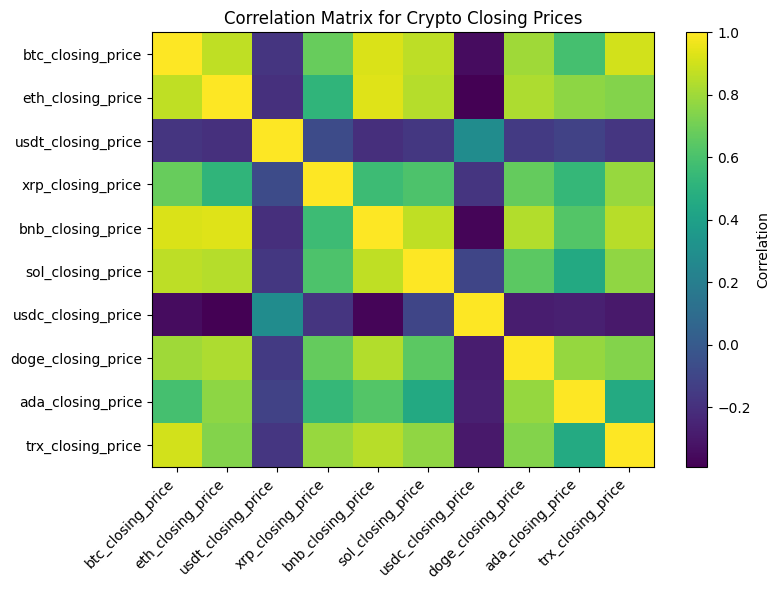

                    btc_closing_price  eth_closing_price  usdt_closing_price  \
btc_closing_price            1.000000           0.865727           -0.176757   
eth_closing_price            0.865727           1.000000           -0.195897   
usdt_closing_price          -0.176757          -0.195897            1.000000   
xrp_closing_price            0.676273           0.518323           -0.072703   
bnb_closing_price            0.923244           0.930198           -0.203822   
sol_closing_price            0.860182           0.845746           -0.165724   
usdc_closing_price          -0.346730          -0.390413            0.285061   
doge_closing_price           0.803561           0.827232           -0.152038   
ada_closing_price            0.588066           0.761198           -0.116082   
trx_closing_price            0.907082           0.742572           -0.170212   

                    xrp_closing_price  bnb_closing_price  sol_closing_price  \
btc_closing_price            0.676273   

In [25]:
closing_cols = []
for ticker, short_sym in coins.items():
    col_price = f"{short_sym}_closing_price"
    if col_price in df.columns:
        closing_cols.append(col_price)

df_closing = df[closing_cols].copy()
for col in closing_cols:
    df_closing[col] = pd.to_numeric(df_closing[col], errors="coerce")

df_closing.dropna(how='all', inplace=True)

corr_matrix = df_closing.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap="viridis", interpolation="none", aspect="auto")
plt.colorbar(label="Correlation")

plt.xticks(range(len(closing_cols)), closing_cols, rotation=45, ha="right")
plt.yticks(range(len(closing_cols)), closing_cols)

plt.title("Correlation Matrix for Crypto Closing Prices")
plt.tight_layout()
plt.show()
print(corr_matrix)

The correlation matrix shows how the closing prices of different cryptocurrencies relate to each other.

Strong positive correlations (yellow squares close to 1) can be seen between several coins, such as BTC, ETH, ADA, and TRX, suggesting that their prices often move in the same direction.

Stablecoins like USDT and USDC show very low or even negative correlations with most other assets, which is expected due to their price stability.

# Prediction

This section compares four regression models to predict Bitcoin's closing price using a simple lag-based feature (price_t_minus_1). The models include Linear Regression, Decision Tree, Random Forest, and Support Vector Regression. Performance is evaluated on a test set using Mean Squared Error (MSE) and R² score.

In [26]:
from sklearn.model_selection import train_test_split
df_btc = df[["Date_dt", "btc_closing_price"]].dropna().copy()
df_btc.sort_values("Date_dt", inplace=True)


df_btc["price_t_minus_1"] = df_btc["btc_closing_price"].shift(1)
df_btc.dropna(inplace=True)

X = df_btc[["price_t_minus_1"]].values  
y = df_btc["btc_closing_price"].values 

train_size = int(0.8 * len(df_btc))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 3078
Test size: 770


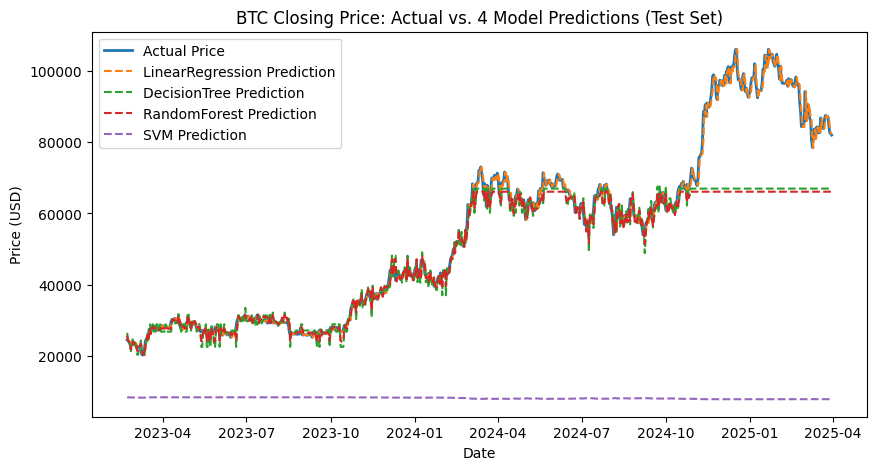

LinearRegression -> MSE: 2554436.54, R^2: 0.996
DecisionTree -> MSE: 151235121.67, R^2: 0.749
RandomForest -> MSE: 159370218.06, R^2: 0.736
SVM -> MSE: 2770828910.32, R^2: -3.596


In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

df_btc = df[["Date_dt", "btc_closing_price"]].dropna().copy()
df_btc.sort_values("Date_dt", inplace=True)


df_btc["price_t_minus_1"] = df_btc["btc_closing_price"].shift(1)
df_btc.dropna(inplace=True)  

X = df_btc[["price_t_minus_1"]].values
y = df_btc["btc_closing_price"].values


train_size = int(0.8 * len(df_btc))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

df_test = df_btc.iloc[train_size:].copy()
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "SVM": SVR(kernel="rbf")
}
predictions = {}
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((model_name, mse, r2))

plt.figure(figsize=(10, 5))

plt.plot(df_test["Date_dt"], df_test["btc_closing_price"], label="Actual Price", linewidth=2)
for model_name, y_pred in predictions.items():
    plt.plot(df_test["Date_dt"], y_pred, label=f"{model_name} Prediction", linestyle="--")

plt.title("BTC Closing Price: Actual vs. 4 Model Predictions (Test Set)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

for r in results:
    print(f"{r[0]} -> MSE: {r[1]:.2f}, R^2: {r[2]:.3f}")


The regression models show varying levels of prediction accuracy:

* Linear Regression performed best with a very low MSE and an R² of 0.996, indicating excellent fit on this simple lag-based setup.

* Decision Tree and Random Forest also followed the trend relatively well, but with noticeably higher errors.

* SVM failed to capture the pattern, resulting in poor predictions and a negative R² score, meaning it performed worse than a horizontal average line.
